# Biodiversity In National Parks

In this project I will interpret data from the National Park Services about endangered species in different parks. I will perform some data analysis on the conservation status of these species and investigate if there are any patterns or themes to the types of species that become endangered.

### Goals

The National Park Service wants to ensure the survival of at-risk species to maintain biodiversity within their parks. I will attempt to understand characteristics about the species, their conservation status, and their relationship to the national parks. Some questions that I will attempt to answer are as follows:

* What is the distribution of conservation status for each species?
* Which types of species are most likely to be endangered?
* Are the difference between conservation status and each species significant?
* Which animal is most prevalent and what is their distribution amongst parks?

### Data

This data was provided by [codecademy.com](https://www.codecademy.com/). The two data sets are: `species_info.csv` and `observations.csv`

## Import Python Modules

The first step will be to import modules that will be used in this project:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

`species_info.csv` and `observations.csv` are read in as `DataFrames` called `Species` and `Observations`. These `DataFrames` will be checked out with `.head()`

### species

`species_info.csv` contains information on the different species within the National Parks. The columns are as follows:

* `category`
* `scientific_name`
* `common_names`
* `conservation_status`

In [4]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### observations

`observations.csv` contains information on recorded sightings of different species throughout the national parks in the last 7 days. The columns are as follows:

* `scientific_name`
* `park_name`
* `observations`

In [5]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Data Size

Next I will check for the dimensions of the data sets. `species` has 5824 rows, and 4 columns. `observations` has 23296 rows, and 3 columns.

In [8]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


## Data Exploration

First I'll explore the number of unique species are present in the `species` data set:

In [9]:
print(f"number of unique species:{species.scientific_name.nunique()}")

number of unique species:5541


Next I'll find the number of `category` that are represented in the data and what those categories are:

In [10]:
print(f"number of categories:{species.category.nunique()}")
print(f"categories:{species.category.unique()}")

number of categories:7
categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Next I'll find the count of each `category` in the data. I've found that vascular plants are the largest species by far. Some of the smaller species include Amphibian's and Reptiles.

In [11]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Another column that I'll explor is `conservation_status`. I've found that this column has 4 categories, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`, and `nan` values

In [13]:
print(f"number of conservation statuses: {species.conservation_status.nunique()}")
print(f"unique conservation statuses:{species.conservation_status.unique()}")

number of conservation statuses: 4
unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Next I'll find the count of each `conservation_status`. I've found that there are 5,633 `nan` values. This means that there are no concerns for these species. However, this could mean that no data was entered for this species and there could still be concern. I've also found that there are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery.

In [14]:
print(f"na values:{species.conservation_status.isna().sum()}")
print(species.groupby("conservation_status").size())

na values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


### Observations

I will now look at the `observations` data. First I'll check the number of parks in the dataset. I find that there are only 4 unique national parks in this dataset.

In [16]:
print(f"number of parks:{observations.park_name.nunique()}")
print(f"unique parks:{observations.park_name.unique()}")

number of parks:4
unique parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Next I'll find the total number of observations logged in the parks. I find that there are 3,314,739 total sightings in the last 7 days.

In [17]:
print(f"number of observations:{observations.observations.sum()}")

number of observations:3314739


## Data Analysis

I will now begin analyzing the data. First I will clean the `conservation_status` column in `species`. I'll start by replacing every `nan` value with `No Intervention`

In [18]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next is to analyze the different categories within the `conservation_status` column. I will not include the categories that don't require intervention. Some findings that stood out were that there were 7 mammals, 4 birds, and 3 fish that all had the `Endangered` status. The highest species of concern were birds with 72 birds in this category.

In [19]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])["scientific_name"]\
    .count().unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


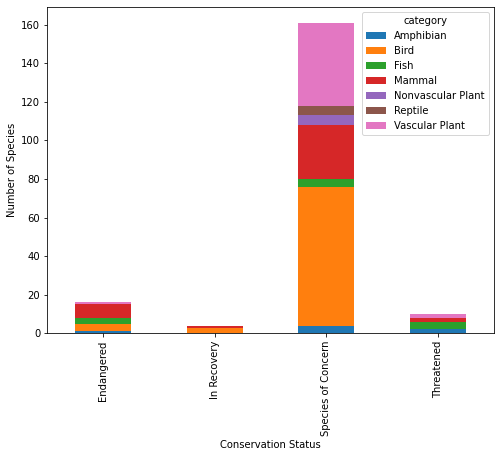

In [21]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6),
                              stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

Next I will find out which species are more likely to be endangered. to do this I will create a new column named `is_protected` which will include any species that had a value other than `No Intervention`

In [22]:
species['is_protected'] = species.conservation_status != 'No Intervention'

Next I'll group by `category` and `is_protected` to show each species and its protections status. I've found that Birds, Vascular Plants, and Mammals have the highest number of species protected

In [23]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                              index='category',
                              values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


I'll find the rate of protection for each `category` to make these numbers make more sense. I've found that 17% of Mammals are under protection and 15% of birds are under protection.

In [24]:
category_counts['percent_protected'] = category_counts.protected / \
                                        (category_counts.protected + category_counts.not_protected) * 100
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


### Statistical Significance

This section will run some chi-squared test to see if different species have statistically significant differences in conservation status rates. I'll run this test to compare Mammals and Birds to find out if they are independent or dependent on one another.

The value of 0.69 was returned from the chi-squared test. This indicates the p-value. A standard p-value to test statistical significance is 0.05. The value form the test of 0.69 is much larger than 0.05 which indicates that there is no significant relationship between mammals and birds. Which means that these variables are independent.

In [25]:
from scipy.stats import chi2_contingency
contingency1 = [[30, 146],
               [75, 413]]
chi2_contingency(contingency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

I will use the same test on `Reptile` and `Mammal`. The p-value I get for this test is 0.039. This is below the standard threshold of 0.05. This means that the difference between `Reptile` and `Mammal` is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles.

In [26]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

### Species in Parks

Next I will look at common names from `species` to get an idea of the most prevalent animals in the dataset. The data will need to be split up into individual names.

In [27]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Next I'll clean up words in duplicate rows.

In [29]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Next the words need to be collapsed into one list.

In [30]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Now I can count the number of occurences of each word. `Bat` occured the most at 23 times and `Shrew` occured the 2nd highest at 18 times.

In [32]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))
    
pd.DataFrame(set(words_counted), columns=['Word', 'Count']).sort_values("Count", ascending=False).head(10)

,Word,Count
7,Bat,23
79,Shrew,18
141,Myotis,17
60,Mouse,16
140,Chipmunk,13
61,Squirrel,12
196,American,12
43,Eastern,11
117,Vole,11
49,Western,10


There are several different scientific names for different types of bats. Now I will check which rows of `species` are referring to bats. A new column of booleans will check if `is_bat` is `True`.

In [33]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex=True)
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Next I'll check a subset of data where `is_bat` is true. It appears that there's a lot of species of bats and a mix of protected vs non-protected species.

In [34]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Next I'll merge the results of the bat species with `observations` to create a dataframe with observations of bats across the four national parks.

In [35]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Now I'll find out how many bat total observations were made at each national park.

I've found that Yellowstone National Park has the highest total number of bat observations in the last 7 days. Great Smoky Mountains National Park has the lowest number of bat observations at 2411.

In [36]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Now I'll find the number of protected bats vs non-protected bat sightings. I've found out that every park except for the Great Smoky Mountains national park has more sightings of protected bats than not.

In [37]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Now I'll plot the output of the last data manipulation. I've found that Yellowstone and Bryce National Park are doing great with their bat population since there are more protected bats vs non-protected bats. The Great Smoky Mountains National Park is not doing as well since they have more non-protected species.

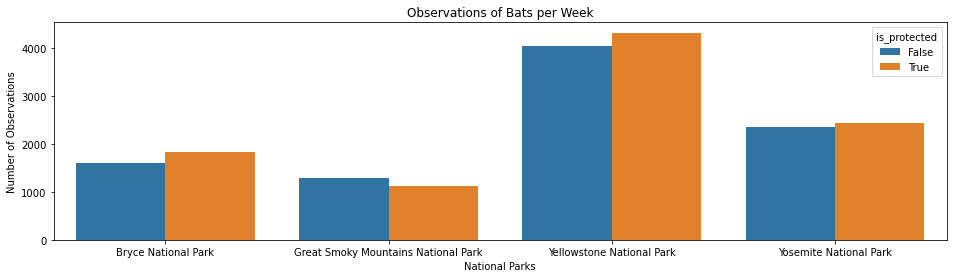

In [41]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()

# Conclusion

This project was able to answer many of the questions that I had about the biodiverstiy in different national parks. I've found these answers from my questions posed in the beginnning:

- What is the distribution of conservation status for each species?
    - The majority of species were not park of the conservation (5,633 vs 191).
- Which types of species are most likely to be endangered?
    - Mammals and Birds had the highest amount in protection.
- Are the difference between conservation status and each species significant?
    - Mammals and Birds did not have a significant difference in conservation percetage. Mammals and Reptiles did show a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - Bats occured the most times and were most likely to be found in Yellowstone National Park.